In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  

In [229]:
df = pd.read_csv('building_metadata.csv')

In [230]:
df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


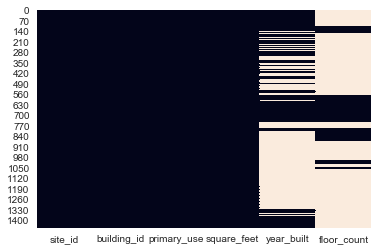

In [231]:
sns.heatmap(df.isnull(), cbar=False)

In [232]:
df.drop(['year_built', 'floor_count'], axis=1, inplace=True)

In [233]:
df.drop('site_id', axis=1, inplace=True)
df.head()

,building_id,primary_use,square_feet
0,0,Education,7432
1,1,Education,2720
2,2,Education,5376
3,3,Education,23685
4,4,Education,116607


In [7]:
df_meter = pd.read_csv('meter_dummies_final.csv')

In [8]:
df_meter.drop('timestamp', axis = 1, inplace=True)
df_meter.head()

,building_id,meter,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed
0,0,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
1,1,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
2,2,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
3,3,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0
4,4,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0


In [234]:
building_mean = df_meter.groupby('building_id')['meter_reading'].mean()

In [235]:
df['mean_meter'] = building_mean

In [210]:
df.head()

,building_id,primary_use,square_feet,mean_meter
0,0,Education,7432,42.925954
1,1,Education,2720,21.943047
2,2,Education,5376,4.265011
3,3,Education,23685,69.039695
4,4,Education,116607,286.228782


In [211]:
df['mean_meter'] = np.where(df['mean_meter'] >= 25000, 25000, df['mean_meter'])

In [196]:
# Continue from here to KNN Test 


In [236]:
# Test
df_sq = df['square_feet'] / df['mean_meter']

In [237]:
df_sq 

0         173.135348
1         123.957262
2        1260.489161
3         343.063508
4         407.390896
5        1525.302294
6        1487.171977
7          83.020487
8         807.497038
9          86.367988
10       1289.573366
11        564.884356
12        882.531703
13        107.603995
14         72.881801
15         88.672522
16        230.399718
17        802.888685
18        305.816326
19        505.388755
20       1175.619171
21        507.922519
22        660.503035
23        819.652402
24        658.025408
25       1598.316124
26        915.248286
27       1183.165943
28         88.788497
29         39.712336
            ...     
1419     4589.258770
1420      778.056759
1421      402.775044
1422     1364.651566
1423     1473.082796
1424      285.124229
1425       11.886113
1426       86.494406
1427      133.121059
1428      618.963965
1429     1258.761680
1430      164.581586
1431      463.447563
1432      331.208584
1433       37.076311
1434      119.615244
1435     1492

In [9]:
#merged df's
merged = pd.merge(df, df_meter)

In [10]:
#creates dummies for primary use category 
merged = pd.concat([merged, pd.get_dummies(merged['primary_use'])], axis=1)

In [11]:
merged.drop('primary_use', axis = 1, inplace=True)

In [12]:
merged.head()

,building_id,square_feet,meter,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,3,air_temperature,dew_temperature,wind_speed,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,0,7432,0,0.0,0,1,0,4,True,1,0,0,0,25.0,20.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7432,0,0.0,0,1,1,4,True,1,0,0,0,24.4,21.1,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7432,0,0.0,0,1,2,4,True,1,0,0,0,22.8,21.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,7432,0,0.0,0,1,3,4,True,1,0,0,0,21.1,20.6,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,7432,0,0.0,0,1,4,4,True,1,0,0,0,20.0,20.0,2.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
merged.drop(['building_id', 'meter'], axis = 1, inplace=True)

,square_feet,meter_reading,site_id,month,hour,weekday,holiday,0,1,2,...,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
0,7432,0.0,0,1,0,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7432,0.0,0,1,1,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7432,0.0,0,1,2,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7432,0.0,0,1,3,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7432,0.0,0,1,4,4,True,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## KNN Testing 
#### Feature Engineering to break down the building sites into more manageable groups.  KNN clustering found 8 

In [216]:
df.drop(['building_id', 'primary_use'], axis=1, inplace=True)

In [217]:
df.head()

,square_feet,mean_meter
0,7432,42.925954
1,2720,21.943047
2,5376,4.265011
3,23685,69.039695
4,116607,286.228782


In [148]:
df.describe()


,square_feet,mean_meter,building_groups
count,1449.000000,1.449000e+03,1449.000000
mean,92111.776398,1.642113e+03,6.993099
std,110769.950997,5.011546e+04,0.185695
min,283.000000,3.999772e-04,2.000000
25%,23012.000000,2.854505e+01,7.000000
50%,57673.000000,8.467258e+01,7.000000
75%,115676.000000,2.391559e+02,7.000000
max,875000.000000,1.907446e+06,7.000000


In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [218]:
df_avg = df[df['mean_meter'] <= 250000]

In [219]:
df_avg.shape

(1449, 2)

In [220]:
scaler = StandardScaler()

In [221]:
scaler.fit(df_avg)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [222]:
scaled_features = scaler.transform(df_avg)

In [223]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
df_feat.head()

,square_feet,mean_meter
0,-0.764729,-0.219494
1,-0.807282,-0.234883
2,-0.783297,-0.247849
3,-0.617951,-0.200342
4,0.221212,-0.041053


In [224]:
kmeans = KMeans()

In [225]:
kmeans.fit(df_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [226]:
kmeans.cluster_centers_

array([[ 0.11195566, -0.05440395],
       [ 5.5202389 ,  9.15522126],
       [ 6.25276311,  0.87728421],
       [ 1.16786391,  3.01628719],
       [-0.57426806, -0.19871334],
       [ 0.64853343, 17.40521146],
       [ 2.91052795,  0.25362722],
       [ 1.1591818 ,  0.264814  ]])

In [227]:
df_avg['building_groups'] = kmeans.predict(df_feat)

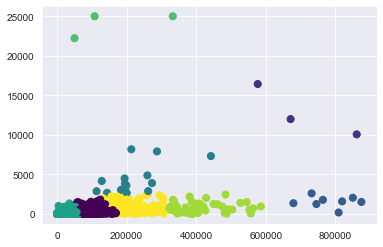

In [228]:
plt.scatter(df_avg['square_feet'], df_avg['mean_meter'], c=df_avg['building_groups'], s=50, cmap='viridis')

### DF Clustering 

In [198]:
# Using the already scaled scaler to transform the original DF now 
df_scaled_features = scaler.transform(df)

In [199]:
#New DF 
df_features = pd.DataFrame(df_scaled_features,columns=df.columns)
df_features.head()

,square_feet,mean_meter
0,-0.764213,-0.232699
1,-0.806821,-0.249951
2,-0.782804,-0.264486
3,-0.617245,-0.211229
4,0.223001,-0.032659


In [200]:
df['building_groups'] = kmeans.predict(df)

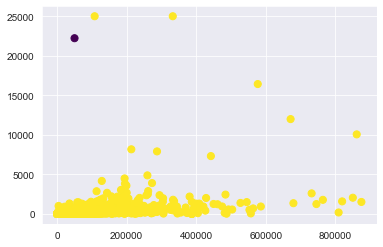

In [201]:
plt.scatter(df['square_feet'], df['mean_meter'], c=df['building_groups'], s=50, cmap='viridis')